In [112]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold , SelectKBest ,f_classif ,mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin ,BaseEstimator
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

In [32]:
# loading the data:
data=pd.read_csv("train.csv")
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
# Get info about the data:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
# Get types of data:

data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [9]:
# Extract the different types of data columns:

obj_cols=data.select_dtypes("object").columns
num_cols=data.select_dtypes("number").columns
disc_cols=data.select_dtypes(include=["int64"]).columns
cont_cols=data.select_dtypes(include=["float64"]).columns
bool_cols=data.select_dtypes(include=["bool"]).columns

print(f" objected features --->>> {obj_cols} \n Numerical features --->>> {num_cols} ")
print(f"Discrete features ---->>> {disc_cols} \n continous features {cont_cols}")
print(f"boll features --->>> {bool_cols}")



 objected features --->>> Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object') 
 Numerical features --->>> Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object') 
Discrete features ---->>> Index([], dtype='object') 
 continous features Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
boll features --->>> Index(['Transported'], dtype='object')


In [10]:
# to describe the  Numerical data:

data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
# to describe the objected data:

data.describe(include=["O"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [13]:
# statistical about passengerid feature:

data["PassengerId"].describe()

count        8693
unique       8693
top       0001_01
freq            1
Name: PassengerId, dtype: object

In [14]:
data["PassengerId"].value_counts()

0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64

In [18]:
# statistical about HomePlanet feature:

data["HomePlanet"].describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [19]:
data["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

<AxesSubplot:ylabel='HomePlanet'>

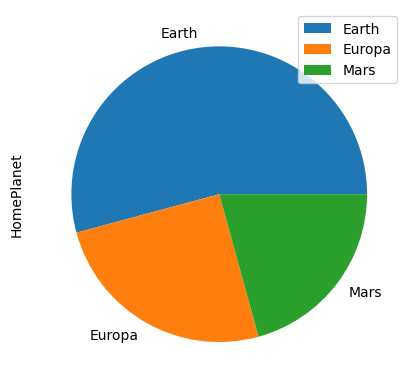

In [21]:
data["HomePlanet"].value_counts().plot(kind="pie",legend=True)

In [22]:
# statistical about CryoSleep feature:

data["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

<AxesSubplot:>

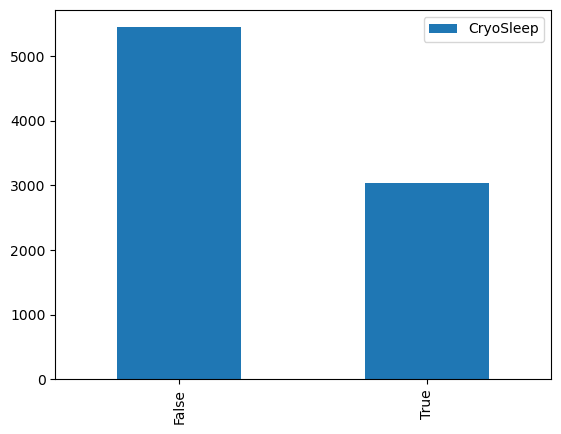

In [25]:
data["CryoSleep"].value_counts().plot(kind="bar",legend=True)

In [26]:
data["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

<AxesSubplot:ylabel='Frequency'>

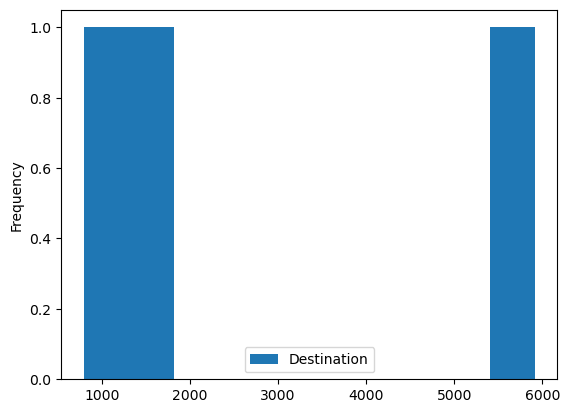

In [3]:
data["Destination"].value_counts().plot(kind="hist",legend=True)

<AxesSubplot:ylabel='HomePlanet'>

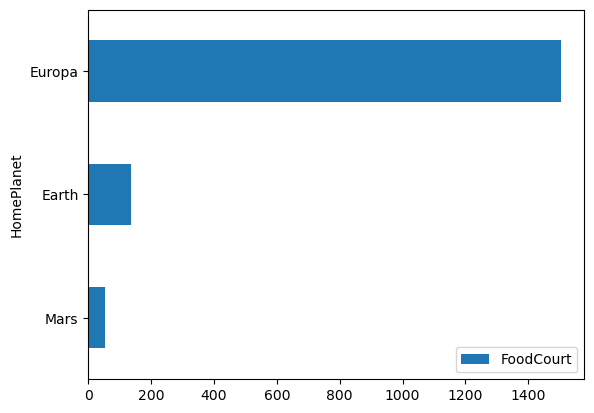

In [4]:
data.groupby(["HomePlanet"])["FoodCourt"].mean().sort_values(ascending=True).plot(kind="barh",legend=True)

G:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

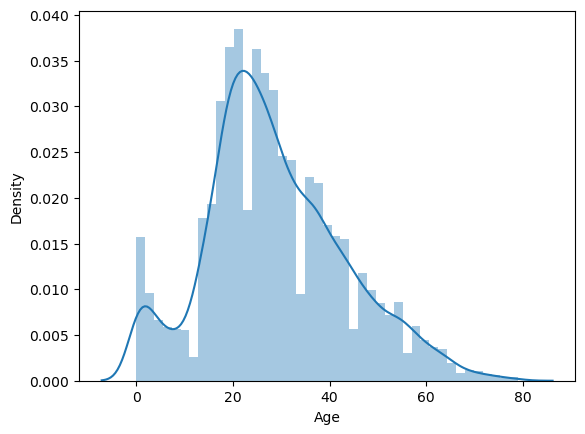

In [5]:
sns.distplot(data["Age"])

In [8]:
# Check the missing values:

data.isna().mean()

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [33]:
# Handle the missing values:

df=data

# Handle the objected data:

df[objected]=df[objected].fillna(df[objected].mode())
objected=df.select_dtypes("object").columns

# Handle the numerical data:

Disc=df.select_dtypes(include=["int64"]).columns

df[Disc]=df[Disc].fillna(df[Disc].median())

cont=df.select_dtypes(include=["float64"]).columns
df[cont]=df[cont].fillna(df[cont].median())





In [34]:
data.isna().mean()

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.000000
VIP             0.023352
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            0.023007
Transported     0.000000
dtype: float64

In [35]:
# feature Name is not important for that we can dropit and also cabin :


data=data.drop(columns=["Cabin","Name"])
data.columns


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [36]:
data.isna().mean()

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Destination     0.020936
Age             0.000000
VIP             0.023352
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Transported     0.000000
dtype: float64

In [40]:
# Simple imputer from sklearn to handle the missing values:

from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="most_frequent")
imputer.fit(data["HomePlanet"].values.reshape(1,-1))
imputer.transform(data["HomePlanet"].values.reshape(1,-1))

array([['Europa', 'Earth', 'Europa', ..., 'Earth', 'Europa', 'Europa']],
      dtype=object)

In [44]:
data=data.drop(columns=["HomePlanet","CryoSleep","Destination","VIP"])
data.columns

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported'],
      dtype='object')

In [45]:
data.isna().mean()

PassengerId     0.0
Age             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Transported     0.0
dtype: float64

<AxesSubplot:xlabel='Age'>

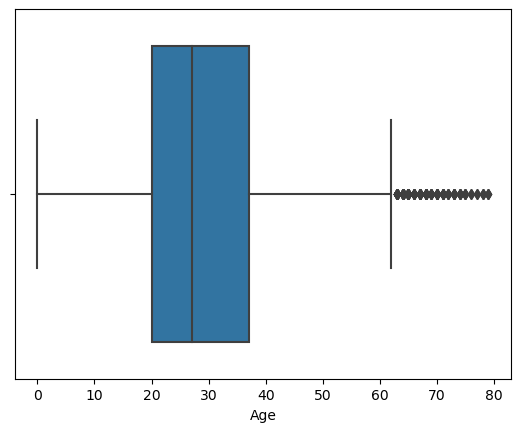

In [46]:
# check the outliers & calc it:

# we use the boxplot & scatterolot to detect the outlier:

sns.boxplot(x=data["Age"])


<AxesSubplot:xlabel='RoomService'>

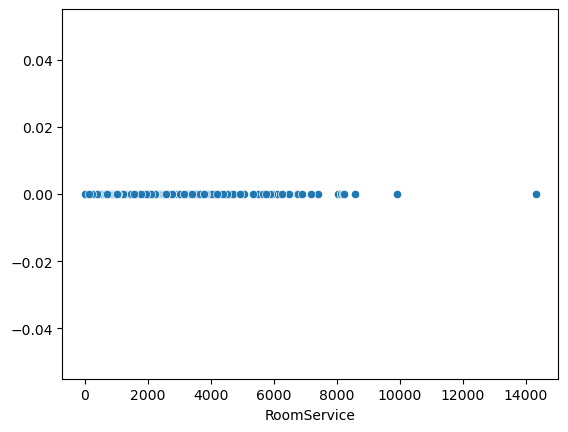

In [47]:
# scatter plot & boxplot for Fare column to detect the outlier:

sns.scatterplot(x=data["RoomService"],y=np.zeros_like(data["RoomService"]))

<AxesSubplot:xlabel='FoodCourt'>

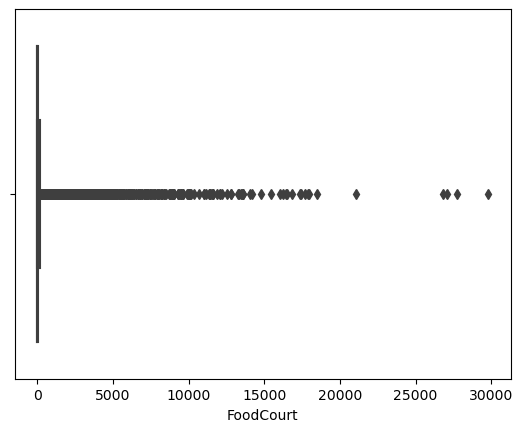

In [48]:
sns.boxplot(x=data["FoodCourt"])

<AxesSubplot:xlabel='FoodCourt'>

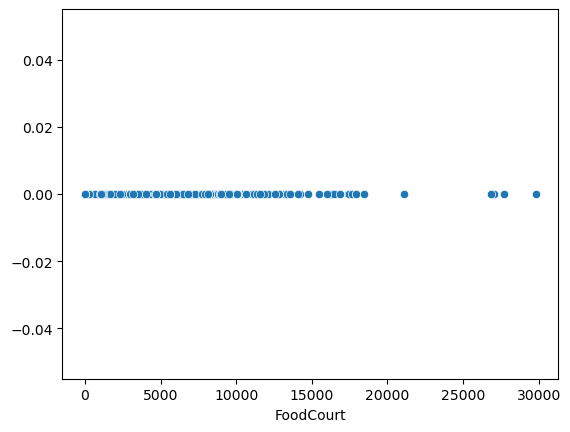

In [50]:
sns.scatterplot(x=data["FoodCourt"],y=np.zeros_like(data["FoodCourt"]))

In [55]:
# calc the outlier for Age:

Q1_Age,Q3_Age=data["Age"].quantile([0.25,0.75])
IQR_Age=Q3_Age-Q1_Age

print('Q1_Age=',Q1_Age)
print("Q3_AGE=",Q3_Age)
print("IQR_Age=",IQR_Age)

low_lim_Age=Q1_Age-1.5*IQR_Age
upper_lim_Age=Q3_Age+1.5*IQR_Age

outlier_Age=[]

print("low_lim_Age=",low_lim_Age)
print("upper_lim_Age=",upper_lim_Age)

for x in data["Age"]: 
    if ((x> upper_lim_Age) or (x<low_lim_Age)): 
         outlier_Age.append(x)
            
print("outlier=",outlier_Age) 
print("Number of outliers =",len(outlier_Age))

Q1_Age= 20.0
Q3_AGE= 37.0
IQR_Age= 17.0
low_lim_Age= -5.5
upper_lim_Age= 62.5
outlier= [64.0, 67.0, 63.0, 67.0, 63.0, 79.0, 68.0, 74.0, 64.0, 65.0, 63.0, 79.0, 65.0, 67.0, 65.0, 67.0, 71.0, 74.0, 64.0, 71.0, 64.0, 75.0, 67.0, 65.0, 67.0, 70.0, 63.0, 76.0, 63.0, 63.0, 78.0, 64.0, 70.0, 67.0, 73.0, 67.0, 65.0, 64.0, 63.0, 63.0, 64.0, 64.0, 68.0, 65.0, 66.0, 63.0, 75.0, 67.0, 70.0, 69.0, 69.0, 69.0, 78.0, 63.0, 71.0, 72.0, 71.0, 68.0, 70.0, 66.0, 69.0, 73.0, 71.0, 74.0, 77.0, 68.0, 64.0, 64.0, 73.0, 64.0, 72.0, 65.0, 74.0, 74.0, 64.0, 70.0, 64.0, 77.0, 67.0, 73.0, 63.0, 63.0, 65.0, 66.0, 65.0, 68.0, 63.0, 75.0, 65.0, 63.0, 64.0, 64.0, 68.0, 64.0, 63.0, 65.0, 65.0, 63.0, 65.0, 64.0, 79.0, 65.0, 63.0, 70.0, 64.0, 64.0, 72.0, 65.0, 68.0, 66.0, 70.0, 64.0, 63.0, 68.0, 64.0, 64.0, 65.0, 65.0, 78.0, 68.0, 64.0, 68.0, 66.0, 68.0, 73.0, 70.0, 65.0, 63.0, 63.0, 63.0, 65.0, 64.0, 63.0, 71.0, 64.0, 63.0, 68.0, 67.0, 63.0, 64.0, 63.0, 67.0, 64.0, 75.0, 69.0, 73.0, 65.0, 69.0, 71.0, 65.0, 72.0, 65.0, 

upper_limit :  5235.80590792345
lower_limit :  -4338.93785316675
Mean Value :  448.4340273783504
1st Standard Deviation :  1595.7906268483666


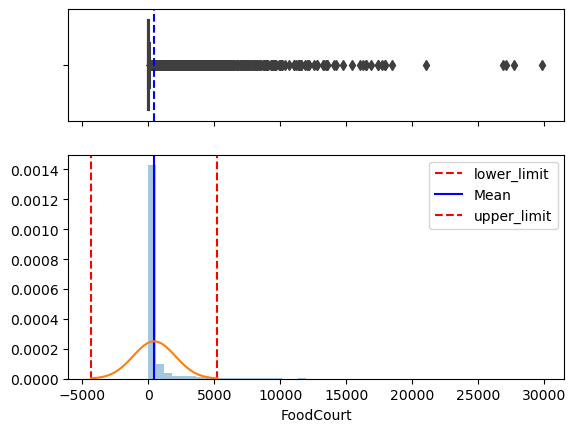

In [56]:
#Another way to calculate outlier:-


from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.FoodCourt.mean()
std = data.FoodCourt.std()
median = data.FoodCourt.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["FoodCourt"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["FoodCourt"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
#print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

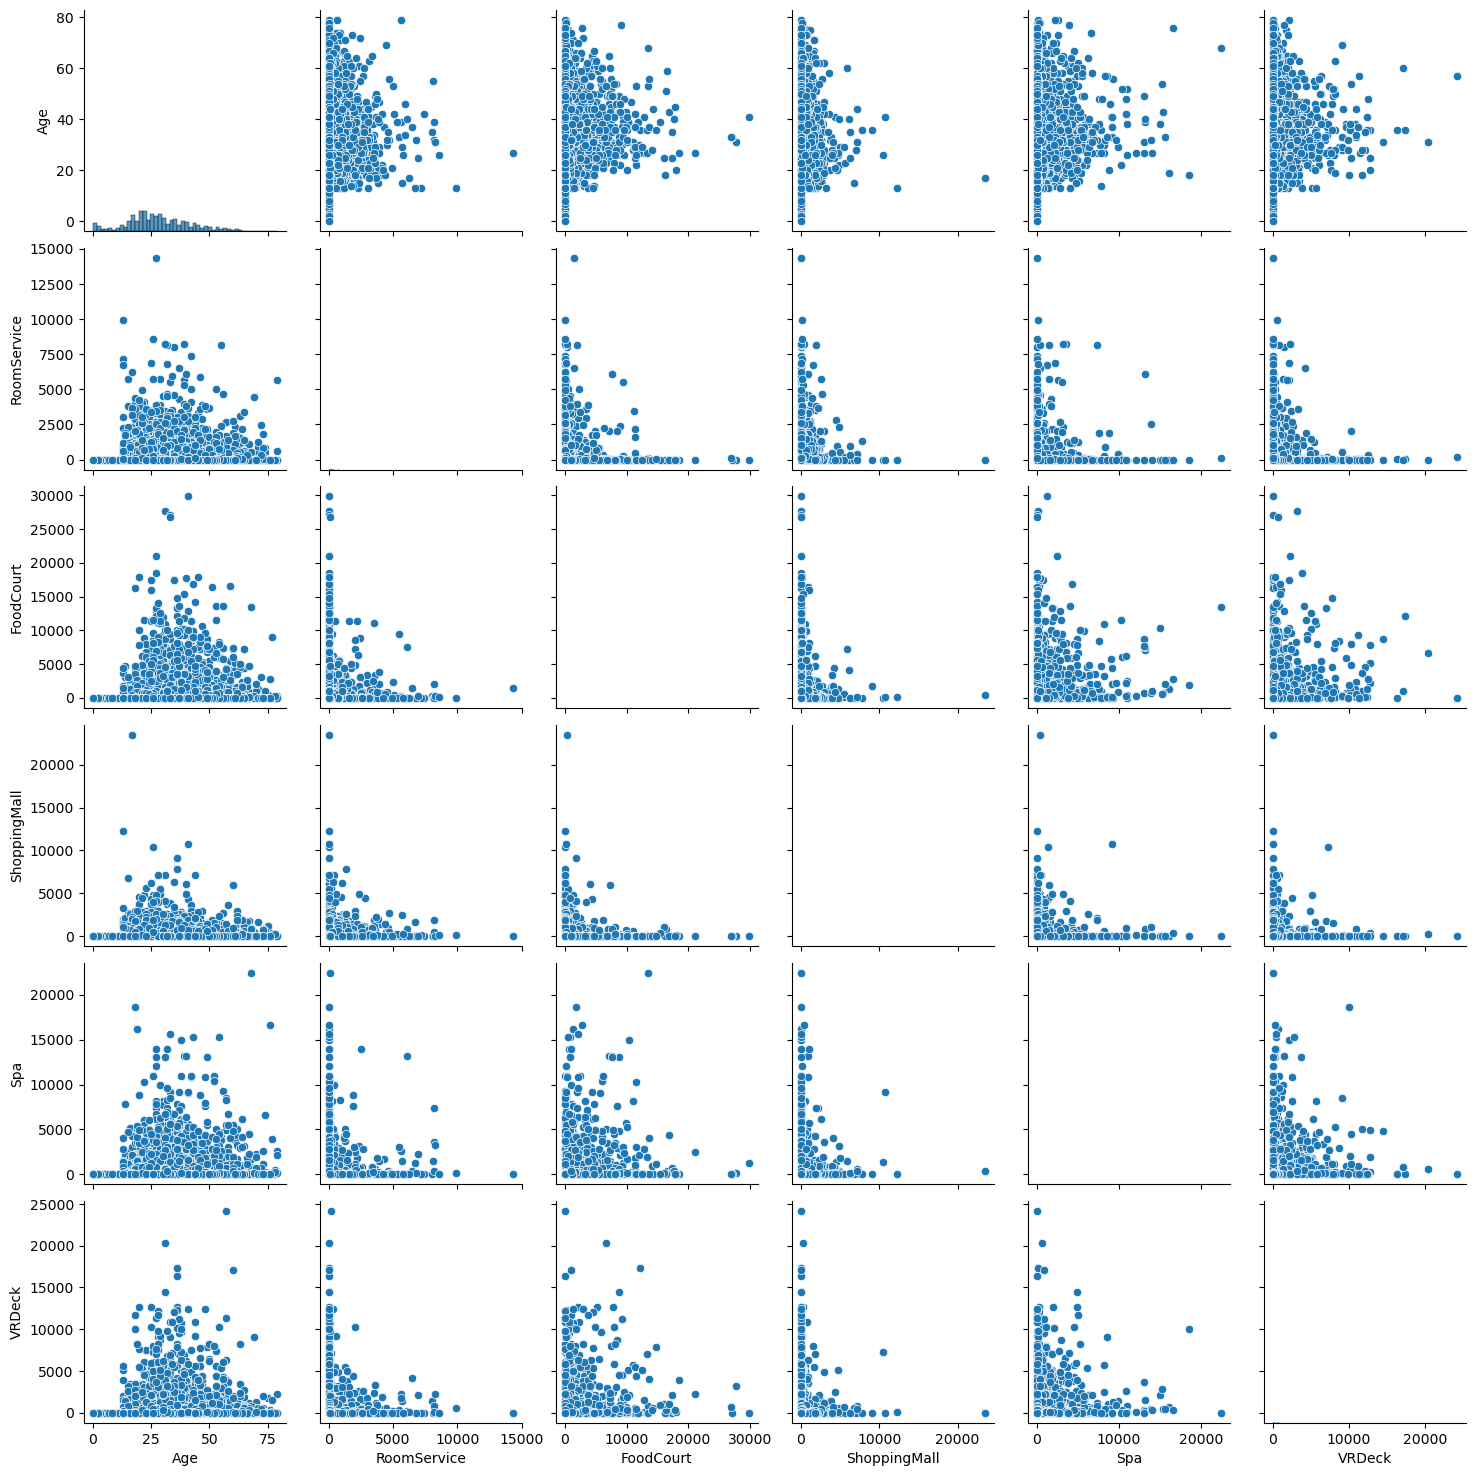

In [58]:
sns.pairplot(data.select_dtypes(include=["float"]))

In [59]:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))
selector.get_support(indices=True)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [63]:
num_cols=data.select_dtypes("number").columns

In [64]:
num_cols[selector.get_support(indices=True)]

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [65]:
data.describe(include=["O"]).T

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1


In [66]:
# detect high-low variance
class Var_Selector(BaseEstimator,TransformerMixin):
    
    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])
        
        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)
        
        # remove high-low cardinality categorical:-
        
        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index
        
        return data.drop(columns=removed_cols)
        

In [67]:
data.head(1)

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False


In [68]:
transform=Var_Selector(data)
transform.fit(data)
transform.transform(data)

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,False


In [69]:
# removed the duplicate features :

df=data.T
duplicate_feature=df.duplicated().sum()
duplicate_feature

0

In [70]:
data.drop_duplicates()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,False


In [71]:
# Calculate the correlation with different methods :-

# 1- using pandas :

data.select_dtypes("number").corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068629,0.127390,0.033148,0.120946,0.099590
RoomService,0.068629,1.000000,-0.015126,0.052337,0.009244,-0.018624
FoodCourt,0.127390,-0.015126,1.000000,-0.013717,0.221468,0.224572
ShoppingMall,0.033148,0.052337,-0.013717,1.000000,0.014542,-0.007849
Spa,0.120946,0.009244,0.221468,0.014542,1.000000,0.147658
VRDeck,0.099590,-0.018624,0.224572,-0.007849,0.147658,1.000000


In [72]:
# 2- using pearson :
data.select_dtypes("number").corr(method="pearson")

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068629,0.127390,0.033148,0.120946,0.099590
RoomService,0.068629,1.000000,-0.015126,0.052337,0.009244,-0.018624
FoodCourt,0.127390,-0.015126,1.000000,-0.013717,0.221468,0.224572
ShoppingMall,0.033148,0.052337,-0.013717,1.000000,0.014542,-0.007849
Spa,0.120946,0.009244,0.221468,0.014542,1.000000,0.147658
VRDeck,0.099590,-0.018624,0.224572,-0.007849,0.147658,1.000000


In [73]:
# 3- usng spearman:

data.select_dtypes("number").corr(method="spearman")

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.121018,0.200438,0.099445,0.191171,0.176715
RoomService,0.121018,1.000000,0.181157,0.430106,0.239521,0.180872
FoodCourt,0.200438,0.181157,1.000000,0.185407,0.470270,0.497026
ShoppingMall,0.099445,0.430106,0.185407,1.000000,0.253359,0.187538
Spa,0.191171,0.239521,0.470270,0.253359,1.000000,0.437234
VRDeck,0.176715,0.180872,0.497026,0.187538,0.437234,1.000000


In [74]:
# 3- usng kendell:

data.select_dtypes("number").corr(method="kendall")

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.092072,0.153561,0.075161,0.145134,0.134735
RoomService,0.092072,1.000000,0.148030,0.358903,0.195946,0.148979
FoodCourt,0.153561,0.148030,1.000000,0.153107,0.393533,0.418334
ShoppingMall,0.075161,0.358903,0.153107,1.000000,0.208800,0.155180
Spa,0.145134,0.195946,0.393533,0.208800,1.000000,0.364780
VRDeck,0.134735,0.148979,0.418334,0.155180,0.364780,1.000000


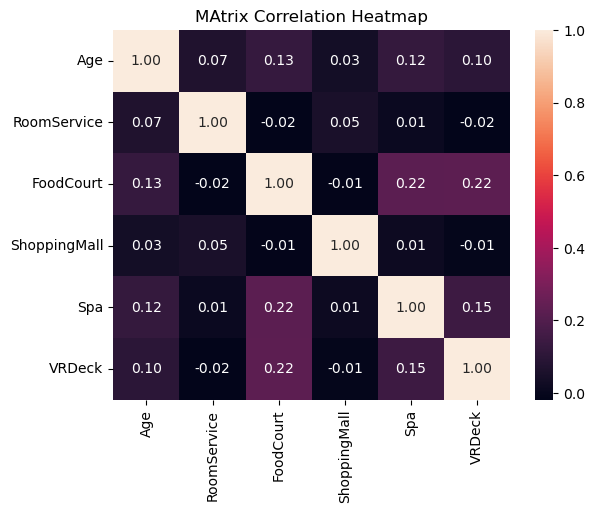

In [75]:
# plot of heatmap correlation :

sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f")
plt.title("MAtrix Correlation Heatmap")
plt.show()

In [76]:
#select the most 5 Numerical features importance :

from sklearn.feature_selection import f_classif, SelectKBest

fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="Transported").select_dtypes("number").fillna(0),data["Transported"])

SelectKBest(k=5)

In [77]:
print(["{:10f}".format(p) for p in fs.pvalues_])
print(["{:10f}".format(p) for p in fs.scores_])

['  0.000000', '  0.000000', '  0.000021', '  0.381314', '  0.000000', '  0.000000']
[' 48.156922', '536.491728', ' 18.096177', '  0.766539', '435.917591', '380.771546']


In [79]:
features_pvalues=pd.DataFrame(fs.pvalues_)
fatures_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="Transported").select_dtypes("number").fillna(0).columns)

In [80]:
feature_score=pd.concat([features_pvalues,fatures_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

,pvalues,score,input
0,4.216286e-12,48.156922,Age
1,3.205394e-115,536.491728,RoomService
2,2.122241e-05,18.096177,FoodCourt
3,3.813140e-01,0.766539,ShoppingMall
4,1.701990e-94,435.917591,Spa
5,4.969701e-83,380.771546,VRDeck


In [83]:
# the most categorical importance: 

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="Transported").select_dtypes("number").fillna(0),data["Transported"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="Transported").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

Age             0.001245
ShoppingMall    0.042544
FoodCourt       0.046941
VRDeck          0.070005
RoomService     0.071825
Spa             0.072719
dtype: float64

In [84]:
# transforms the data:

label_encoder=LabelEncoder()

for col in data:
    data[col]=label_encoder.fit_transform(data[col])
    
data.head(10)    

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,39,0,0,0,0,0,0
1,1,24,109,9,25,456,44,1
2,2,58,43,1206,0,1273,49,0
3,3,33,0,806,332,1132,187,0
4,4,16,277,69,149,470,2,1
5,5,44,0,393,0,272,0,1
6,6,26,42,891,3,0,0,1
7,7,28,0,0,0,0,0,1
8,8,35,0,599,17,208,0,1
9,9,14,0,0,0,0,0,1


In [85]:
# Divivde the data into x,y:

x=data.drop("Transported",axis=1)
y=data["Transported"]


In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42)
x_train

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
2074,2074,27,0,84,0,239,483
6448,6448,30,621,11,995,0,0
8117,8117,8,0,0,0,0,0
5397,5397,24,0,0,0,677,187
6867,6867,25,0,0,0,0,0
...,...,...,...,...,...,...,...
625,625,3,0,0,0,0,0
4406,4406,38,178,191,0,109,332
7020,7020,43,0,0,0,0,0
4495,4495,23,0,0,0,0,0


In [87]:
model=tree.DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [88]:
print(f"accuracity ------>>> {model.score(x_test,y_test)*100:0.2f}%")

accuracity ------>>> 77.55%


In [89]:
text_represention=tree.export_text(model)
print(text_represention)

|--- feature_2 <= 0.50
|   |--- feature_5 <= 13.50
|   |   |--- feature_6 <= 128.50
|   |   |   |--- feature_0 <= 3013.00
|   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  3013.00
|   |   |   |   |--- feature_0 <= 6899.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6899.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_6 >  128.50
|   |   |   |--- feature_3 <= 1209.50
|   |   |   |   |--- feature_6 <= 555.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  555.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1209.50
|   |   |   |   |--- feature_0 <= 7640.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  7640.50
|   |   |   |   |   |--- class: 0
|   |--- feature_5 >  13.50
|   |   |--- feature_3 <= 1069.50
|   |   |   |--- feature_4 <= 445.50
|   |   |   |   |--- feature_3 <

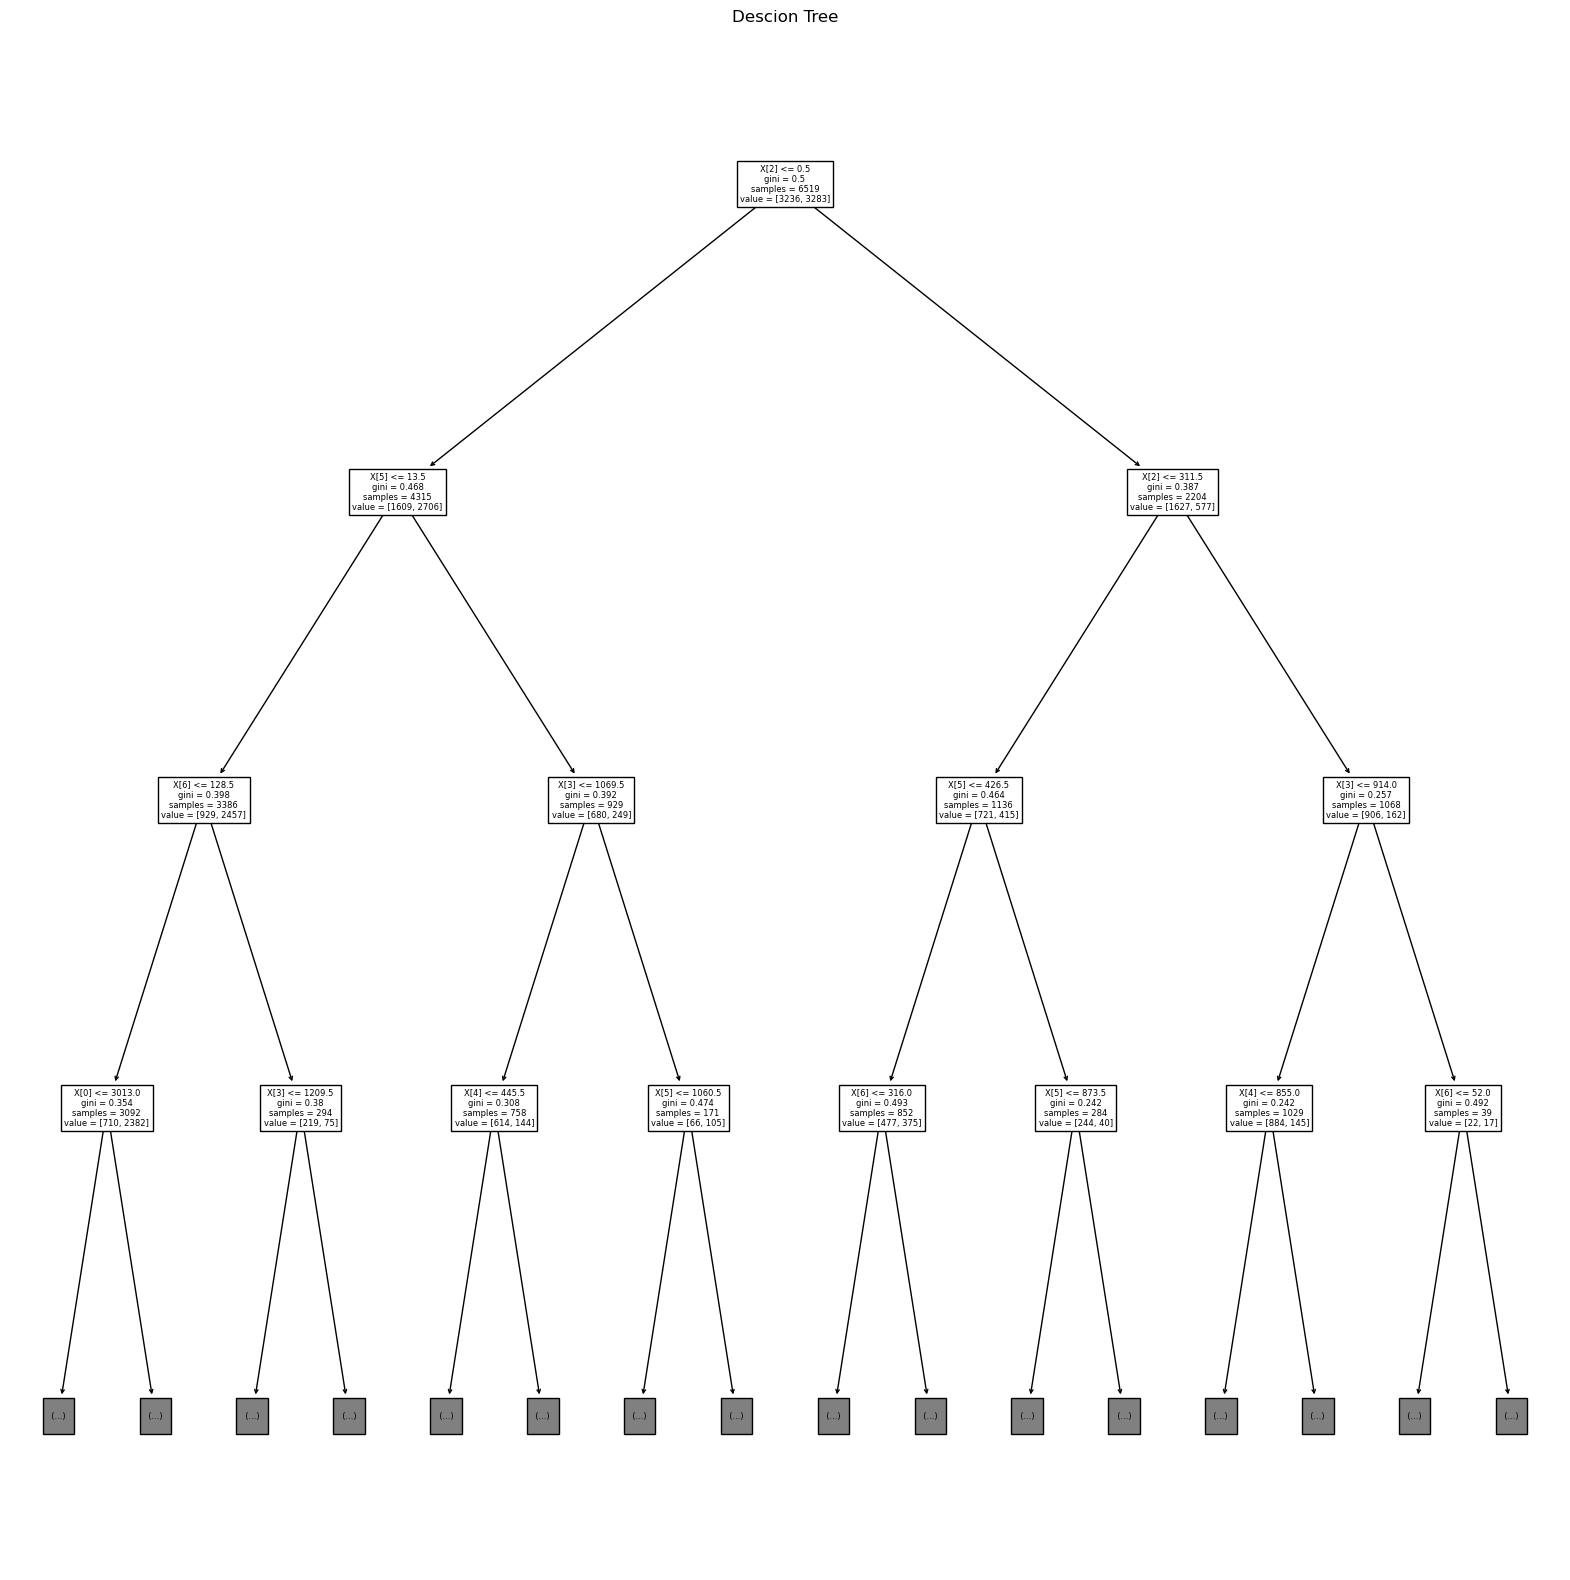

In [92]:
plt.figure(figsize=(20,20))
tree.plot_tree(model,max_depth=3)
plt.title("Descion Tree")
plt.show()

In [101]:
# By using RaandomForestClassifier:

model1=RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [102]:
model1.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [103]:
y_predicted=model1.predict(x_test)
y_predicted[:10]

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [104]:
num_cols[y_predicted[:10]]

Index(['Age', 'Age', 'RoomService', 'Age', 'RoomService', 'RoomService',
       'RoomService', 'RoomService', 'Age', 'Age'],
      dtype='object')

In [106]:
print(f"accuracity --->>>{model1.score(x_test,y_test)*100:0.2f}%")

accuracity --->>>76.08%


In [107]:
# improve the accuracity:


np.random.seed()

for i in range(10,101,10):
    print(f"accuracy at n_estimators {i}=")
    model2=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"accuracity={model2.score(x_test,y_test)*100:0.2f}%")

accuracy at n_estimators 10=
accuracity=75.07%
accuracy at n_estimators 20=
accuracity=75.76%
accuracy at n_estimators 30=
accuracity=75.94%
accuracy at n_estimators 40=
accuracity=76.03%
accuracy at n_estimators 50=
accuracity=75.90%
accuracy at n_estimators 60=
accuracity=76.08%
accuracy at n_estimators 70=
accuracity=76.13%
accuracy at n_estimators 80=
accuracity=76.13%
accuracy at n_estimators 90=
accuracity=76.54%
accuracy at n_estimators 100=
accuracity=76.13%


In [113]:
# By using SVC:

model3=SVC()
model3.fit(x_train,y_train)

SVC()

In [114]:
print(f"accuracity -->>{model3.score(x_test,y_test)*100:0.2f}%")

accuracity -->>77.46%
